# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
from nbdev.showdoc import *

In [ ]:
#| export
def foo(): pass

In [ ]:
import nbdev; nbdev.nbdev_export()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[<POINT (0.296 0.257)>,
 <POINT (0.046 0.874)>,
 <POINT (0.591 0.434)>,
 <POINT (0.491 0.696)>,
 <POINT (0.817 0.16)>,
 <POINT (0.34 0.364)>,
 <POINT (0.575 0.804)>,
 <POINT (0.907 0.896)>,
 <POINT (0.258 0.934)>,
 <POINT (0.068 0.468)>,
 <POINT (0.407 0.803)>,
 <POINT (0.719 0.257)>,
 <POINT (0.036 0.485)>,
 <POINT (0.85 0.943)>,
 <POINT (0.578 0.305)>,
 <POINT (0.623 0.832)>,
 <POINT (0.472 0.348)>,
 <POINT (0.428 0.745)>,
 <POINT (0.837 0.153)>,
 <POINT (0.351 0.949)>,
 <POINT (0.199 0.018)>,
 <POINT (0.986 0.097)>,
 <POINT (0.977 0.588)>,
 <POINT (0.111 0.647)>,
 <POINT (0.965 0.907)>,
 <POINT (0.266 0.268)>,
 <POINT (0.319 0.554)>,
 <POINT (0.451 0.249)>,
 <POINT (0.083 0.255)>,
 <POINT (0.739 0.598)>,
 <POINT (0.766 0.749)>,
 <POINT (0.616 0.631)>,
 <POINT (0.5 0.685)>,
 <POINT (0.767 0.57)>,
 <POINT (0.215 0.777)>,
 <POINT (0.165 0.498)>,
 <POINT (0.329 0.876)>,
 <POINT (0.023 0.765)>,
 <POINT (0.624 0.799)>,
 <POINT (0.502 0.398)>]

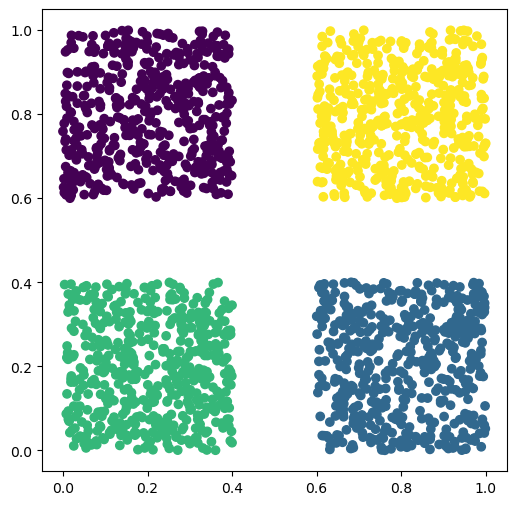

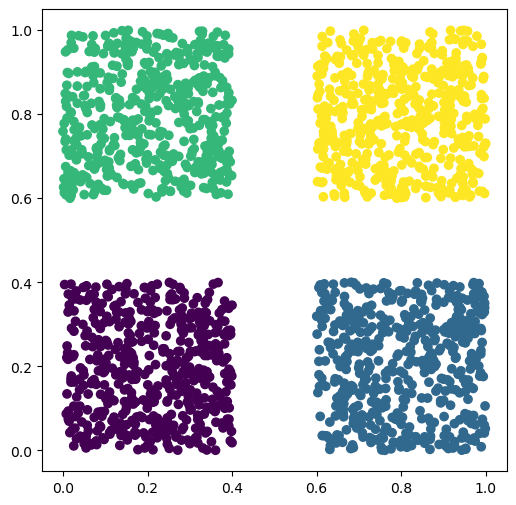

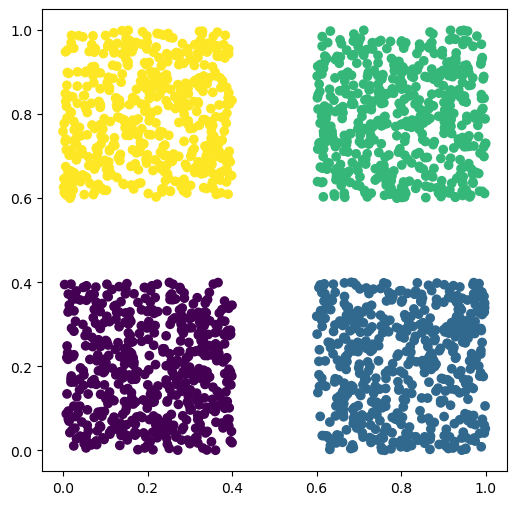

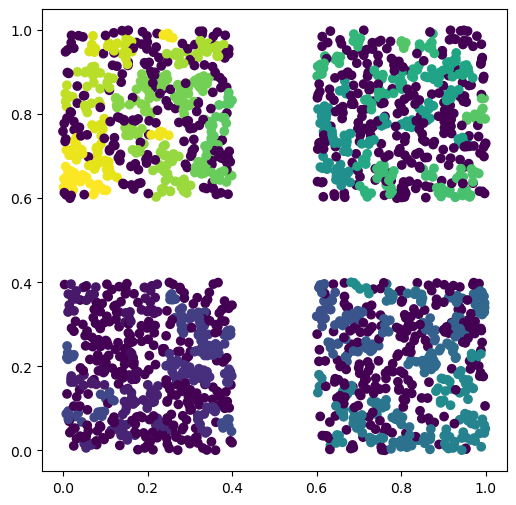

In [ ]:
#| default_exp cluster_ejemplo
#| hide
import nbdev; nbdev.nbdev_export()
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random
import numpy as np
import shapely
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x=0, min_y=0, max_x=1, max_y=1, seed=None):
        if seed is not None:
            random.seed(seed)
        Xpoint = np.random.uniform(low=min_x, high=max_x, size=n)
        Ypoint = np.random.uniform(low=min_y, high=max_y, size=n)
        self.Points = [shapely.Point(x[0], x[1]) for x in zip(Xpoint, Ypoint)]
        
    @classmethod
    def from_list(cls, list_points):
        """Se genera los datos usando una lista de puntos"""
        toto = cls(0)
        toto.Points = list_points
        return toto
    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points
    
    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]
    
    def get_Y(self):
        """Regresa las coordenadas Y"""
        return [x.y for x in self.Points]
    
    def centroid(self):
        """Regresa el centroide de los puntos"""
        return shapely.centroid(self.get_Multypoint())
    
    def as_array(self):
        """Regresa los puntos como un array"""
        list_arrays = np.array([(geom.xy[0][0], geom.xy[1][0]) for geom in self.Points])
        return list_arrays
    
    def add_points(self, data_points):
        """Agrega puntos de otra instancia de data_points"""
        self.Points = self.Points + data_points.Points
        return


datos_simples = data_points(40)
datos_simples.get_points()
datos_simples.get_points()
datos_simples.get_Multypoint()
datos_simples.get_X()
datos_simples.get_Y()
if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion")

#| export
class Clusters:
    """Una clase que contiene los clusters"""
    def __init__(self, data_structure):
        self.data_structure = data_structure
    
    def DBSCAN(self, eps=0.3, min_samples=5):
        """Realiza un DBSCAN clustering"""
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(self.data_structure.as_array())
        self.data_structure.classes_DBSCAN = clustering.labels_
        return clustering
    
    def KMeans(self, n_clusters=4):
        """Realiza un KMeans clustering"""
        clustering = KMeans(n_clusters=n_clusters).fit(self.data_structure.as_array())
        self.data_structure.classes_Kmeans = clustering.labels_
        return clustering
    
    def HDBSCAN(self, min_cluster_size=5):
        """Realiza un HDBSCAN clustering"""
        clustering = HDBSCAN(min_cluster_size=min_cluster_size).fit(self.data_structure.as_array())
        self.data_structure.classes_HDBSCAN = clustering.labels_
        return clustering
    
    def OPTICS(self, min_samples=5):
        """Realiza un OPTICS clustering"""
        clustering = OPTICS(min_samples=min_samples).fit(self.data_structure.as_array())
        self.data_structure.classes_OPTICS = clustering.labels_
        return clustering


datos_simples = data_points(40)
cluster_all = Clusters(datos_simples)
cluster_all.DBSCAN()
cluster_all.KMeans()
cluster_all.HDBSCAN()
cluster_all.OPTICS()
show_doc(Clusters.KMeans)
show_doc(Clusters.DBSCAN)
show_doc(Clusters.HDBSCAN)
show_doc(Clusters.OPTICS)

datos_simples_3 = data_points(500, min_x=0.6, min_y=0.6, max_x=1.0, max_y=1.0)
datos_simples_2 = data_points(500, min_x=0.0, min_y=0.6, max_x=0.4, max_y=1.0)
datos_simples_1 = data_points(500, min_x=0.6, min_y=0.0, max_x=1.0, max_y=0.4)
datos_simples_0 = data_points(500, min_x=0.0, min_y=0.0, max_x=0.4, max_y=0.4)

datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)
datos_simples_0.get_Multypoint()

cluster_all = Clusters(datos_simples_0)
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    cluster_all.data_structure.get_X(),
    cluster_all.data_structure.get_Y(),
    c=cluster_all.data_structure.classes_Kmeans
)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    cluster_all.data_structure.get_X(),
    cluster_all.data_structure.get_Y(),
    c=cluster_all.data_structure.classes_DBSCAN
)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    cluster_all.data_structure.get_X(),
    cluster_all.data_structure.get_Y(),
    c=cluster_all.data_structure.classes_HDBSCAN
)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    cluster_all.data_structure.get_X(),
    cluster_all.data_structure.get_Y(),
    c=cluster_all.data_structure.classes_OPTICS
)

datos_simples.get_points()